# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv(".env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [5]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [6]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [7]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [8]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD").json()


# Display the response data
print(json.dumps(btc_response, indent=4, sort_keys=True))



{
    "data": {
        "1": {
            "circulating_supply": 19027800,
            "id": 1,
            "last_updated": 1651430643,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 728218283802,
                    "percent_change_1h": -0.631796296555025,
                    "percent_change_24h": -0.222220625824125,
                    "percent_change_7d": -3.28366476468911,
                    "percentage_change_1h": -0.631796296555025,
                    "percentage_change_24h": -0.222220625824125,
                    "percentage_change_7d": -3.28366476468911,
                    "price": 38263.0,
                    "volume_24h": 23954795423
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19027800,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

In [9]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD").json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120605907,
            "id": 1027,
            "last_updated": 1651430577,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 337397486374,
                    "percent_change_1h": -0.598872660438186,
                    "percent_change_24h": 0.100069070712803,
                    "percent_change_7d": -4.96485581896126,
                    "percentage_change_1h": -0.598872660438186,
                    "percentage_change_24h": 0.100069070712803,
                    "percentage_change_7d": -4.96485581896126,
                    "price": 2794.69,
                    "volume_24h": 14504150780
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120605907,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [11]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

print (btc_price)




38263.0


In [12]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

print (eth_price)




2794.69


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [13]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins
print (btc_value)

# Print current value of your holding in BTC
# YOUR CODE HERE


45915.6


In [14]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins
print (eth_value)

# Print current value of your holding in ETH
# YOUR CODE HERE


14811.857


In [15]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print (total_crypto_wallet)


60727.456999999995


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [16]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [17]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)



'AKXJ5V3433MAJA11HIIK'

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [19]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = "1D"

# Alternatively you can use a start and end date of 2020-08-07
# Format current date as ISO format

start_date = pd.Timestamp("2022-04-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-29", tz="America/New_York").isoformat()






#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [20]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

# Concatenate the ticker DataFrames
# YOUR CODE HERE

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE




# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

cp_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

SPY = cp_df[cp_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = cp_df[cp_df['symbol']=='AGG'].drop('symbol', axis=1)

cp_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

cp_df.head()

SPY                                    \
                             open    high     low  close     volume   
timestamp                                                             
2022-04-29 04:00:00+00:00  423.56  425.87  411.21  412.0  145242451   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-29 04:00:00+00:00     1143618  416.879474  102.92  103.27  102.82   

                                                                   
                            close   volume trade_count       vwap  
timestamp                                                          
2022-04-29 04:00:00+00:00  102.87  9922012       33928  103.00342

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [21]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = cp_df["AGG"]["close"][0]

# Print the AGG closing price
agg_close_price


102.87

In [22]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = cp_df["SPY"]["close"][0]

# Print the SPY closing price
spy_close_price


412.0

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [23]:
# Calculate the current value of the bond portion of the portfolio

agg_value = agg_shares * agg_close_price


# Print the current value of the bond portfolio
agg_value


20574.0

In [24]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value


45320.0

In [25]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


65894.0

In [26]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio


126621.457

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [27]:
# Consolidate financial assets data into a Python list
savings_data=[total_crypto_wallet, total_stocks_bonds]


# Review the Python list savings_data
savings_data
    

[60727.456999999995, 65894.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [28]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=['crypto', 'stocks/bonds'])


# Display the savings_df DataFrame
savings_df


,amount
crypto,60727.457
stocks/bonds,65894.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

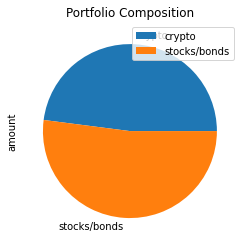

In [29]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie c
savings_df.plot.pie(y="amount", title="Portfolio Composition")



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [30]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3 


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [31]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
if total_portfolio > emergency_fund_value: 
    print("Congratulations you have enough money in this fund!")
elif total_portfolio == emergency_fund_value:
    print("Nice job reaching this milestone!")
elif total_portfolio < emergency_fund_value: 
    print(f"You are {emergency_fund_value-total_portfolio} away")


Congratulations you have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [45]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date_monte = pd.Timestamp("2020-04-07", tz="America/New_York").isoformat()
end_date_monte = pd.Timestamp("2021-04-07", tz="America/New_York").isoformat()
# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows=1000



In [46]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
tickers = ['AGG', 'SPY']
mc_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date_monte,
    end=end_date_monte,
    limit=limit_rows
).df

mc_df.drop(['trade_count', 'vwap'], axis=1, inplace=True)
# Reorganize the DataFrame
# Separate ticker data


# Concatenate the ticker DataFrames'
AGG = mc_df[mc_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = mc_df[mc_df['symbol']=='SPY'].drop('symbol', axis=1)


mc_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])


# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE


mc_df


AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-04-07 04:00:00+00:00  115.61  115.7400  115.3600  115.70   7743944   
2020-04-08 04:00:00+00:00  115.70  115.9700  115.5500  115.81   4674198   
2020-04-09 04:00:00+00:00  116.50  117.2500  116.1700  117.25   5584110   
2020-04-13 04:00:00+00:00  117.09  117.1700  116.5308  116.70   5738262   
2020-04-14 04:00:00+00:00  116.99  117.0000  116.5850  116.76   5506798   
...                           ...       ...       ...     ...       ...   
2021-03-31 04:00:00+00:00  113.84  113.9800  113.7100  113.83   6309151   
2021-04-01 04:00:00+00:00  113.93  114.0500  113.8300  114.04  10766423   
2021-04-05 04:00:00+00:00  113.84  113.8900  113.6900  113.81   9229625   
2021-04-06 04:00:00+00:00  113.98  114.2200  113.9500  114.21   4859922   
2021-04-07 04:00:00+00:00  114.12  114.2584  114.0250  114.03   4502694   

                              SPY                                       
                             open    high       low   close     volume  
timestamp                                                               
2020-04-07 04:00:00+00:00  274.30  275.03  264.8900  265.13  201450339  
2020-04-08 04:00:00+00:00  268.05  276.00  265.2542  274.03  153774685  
2020-04-09 04:00:00+00:00  277.81  281.20  275.4700  278.20  190283195  
2020-04-13 04:00:00+00:00  277.15  277.51  271.4100  275.66  115005853  
2020-04-14 04:00:00+00:00  281.08  284.90  275.5106  283.79  134143482  
...                           ...     ...       ...     ...        ...  
2021-03-31 04:00:00+00:00  395.35  398.00  395.3100  396.33  112826049  
2021-04-01 04:00:00+00:00  398.34  400.67  398.1800  400.61   99157757  
2021-04-05 04:00:00+00:00  403.49  406.94  403.3800  406.36   91242966  
2021-04-06 04:00:00+00:00  405.83  407.24  405.4000  406.12   61766326  
2021-04-07 04:00:00+00:00  405.95  406.96  405.4500  406.59   55311029  

[252 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [47]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_SPY_AGG = MCSimulation(
    portfolio_data = mc_df,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
# YOUR CODE HERE
MC_SPY_AGG.portfolio_data.head()


AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-04-07 04:00:00+00:00  115.61  115.74  115.3600  115.70  7743944   
2020-04-08 04:00:00+00:00  115.70  115.97  115.5500  115.81  4674198   
2020-04-09 04:00:00+00:00  116.50  117.25  116.1700  117.25  5584110   
2020-04-13 04:00:00+00:00  117.09  117.17  116.5308  116.70  5738262   
2020-04-14 04:00:00+00:00  116.99  117.00  116.5850  116.76  5506798   

                                           SPY                            \
                          daily_return    open    high       low   close   
timestamp                                                                  
2020-04-07 04:00:00+00:00          NaN  274.30  275.03  264.8900  265.13   
2020-04-08 04:00:00+00:00     0.000951  268.05  276.00  265.2542  274.03   
2020-04-09 04:00:00+00:00     0.012434  277.81  281.20  275.4700  278.20   
2020-04-13 04:00:00+00:00    -0.004691  277.15  277.51  271.4100  275.66   
2020-04-14 04:00:00+00:00     0.000514  281.08  284.90  275.5106  283.79   

                                                   
                              volume daily_return  
timestamp                                          
2020-04-07 04:00:00+00:00  201450339          NaN  
2020-04-08 04:00:00+00:00  153774685     0.033568  
2020-04-09 04:00:00+00:00  190283195     0.015217  
2020-04-13 04:00:00+00:00  115005853    -0.009130  
2020-04-14 04:00:00+00:00  134143482     0.029493

In [51]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_SPY_AGG.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/carlosguerra/Desktop/CH5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996438,1.009173,1.007745,1.017899,0.990551,1.015274,1.003541,0.999378,0.985140,0.999163,...,1.005042,0.996075,1.002541,0.992215,1.016678,1.000675,0.994790,1.001765,1.014474,1.000872
2,0.995097,1.002295,1.015636,1.007718,0.998232,1.027296,1.000646,1.009858,0.989850,0.999575,...,1.021548,0.999738,1.006974,0.984421,1.011830,0.985573,0.988704,1.012805,1.011035,1.007250
3,0.987557,1.001076,1.009561,1.009165,0.995012,1.053341,0.999811,1.019008,0.998781,1.009415,...,1.025648,1.009095,1.001354,0.989631,1.021113,0.991626,0.987639,1.013099,1.013165,0.998511
4,0.997181,1.003660,0.993409,1.013736,0.989651,1.056242,1.003307,1.022647,0.999080,1.006401,...,1.024923,1.003468,1.006613,0.987968,1.023566,0.998351,0.986296,1.003078,1.008928,1.009386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1340.969915,4621.270480,2140.770887,4610.820934,2834.505807,2406.919105,1515.181894,1479.413947,1349.961872,1991.242292,...,1206.018940,1628.265446,4000.744049,2680.676636,1237.870279,3450.837346,1704.466973,3912.833608,3964.123812,2381.234588
7557,1345.934208,4665.330305,2175.132873,4621.212661,2874.744475,2399.894785,1534.672268,1488.822337,1356.359952,2006.370784,...,1206.730139,1627.021627,3982.477181,2713.425742,1240.982641,3418.171737,1705.539963,3893.388319,4008.536523,2399.150542
7558,1334.517992,4654.526060,2182.135514,4656.424730,2854.721515,2379.440907,1532.522784,1499.435899,1343.733263,2016.245991,...,1188.789157,1608.703488,3942.925047,2698.530268,1244.084240,3421.821084,1721.197402,3879.697470,3987.728348,2383.388180
7559,1331.070192,4603.904745,2205.919588,4688.761231,2880.054155,2352.370819,1525.928350,1509.120232,1348.553070,2012.679118,...,1197.822754,1602.000399,3990.714229,2689.087848,1247.466947,3447.507427,1715.723250,3826.478263,3965.249522,2405.154477


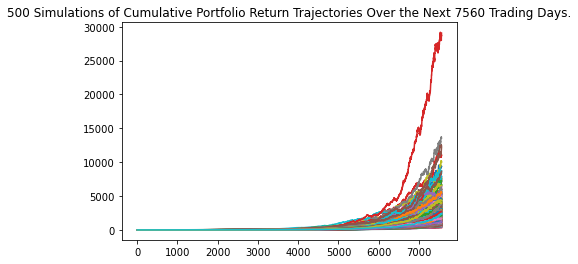

In [52]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_sim_line_plot = MC_SPY_AGG.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

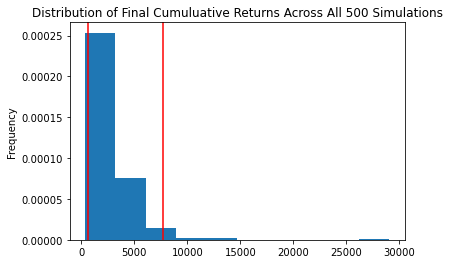

In [53]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_SPY_AGG.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [55]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_SPY_AGG.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count             500.000000
mean             2672.673121
std              2212.107742
min               326.891281
25%              1369.016567
50%              2134.040570
75%              3332.154950
max             29053.966121
95% CI Lower      618.949884
95% CI Upper     7724.893709
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [56]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


65894.0

In [60]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_low_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_up__cumulative_return = MC_summary_statistics[9] * total_stocks_bonds


# Print the result of your calculations
print(f"There is a 95% chance that the current portfolio of ST+B in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_low_cumulative_return: .2f} and ${ci_up__cumulative_return: .2f}.")


There is a 95% chance that the current portfolio of ST+B in the portfolio over the next 30 years will end within in the range of $ 40785083.67 and $ 509024146.04.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [62]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_SPY_AGG_ten = MCSimulation(
    portfolio_data = mc_df,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
# YOUR CODE HERE
MC_SPY_AGG_ten.portfolio_data.head()
# Review the simulation input data
# YOUR CODE HERE


AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-04-07 04:00:00+00:00  115.61  115.74  115.3600  115.70  7743944   
2020-04-08 04:00:00+00:00  115.70  115.97  115.5500  115.81  4674198   
2020-04-09 04:00:00+00:00  116.50  117.25  116.1700  117.25  5584110   
2020-04-13 04:00:00+00:00  117.09  117.17  116.5308  116.70  5738262   
2020-04-14 04:00:00+00:00  116.99  117.00  116.5850  116.76  5506798   

                                           SPY                            \
                          daily_return    open    high       low   close   
timestamp                                                                  
2020-04-07 04:00:00+00:00          NaN  274.30  275.03  264.8900  265.13   
2020-04-08 04:00:00+00:00     0.000951  268.05  276.00  265.2542  274.03   
2020-04-09 04:00:00+00:00     0.012434  277.81  281.20  275.4700  278.20   
2020-04-13 04:00:00+00:00    -0.004691  277.15  277.51  271.4100  275.66   
2020-04-14 04:00:00+00:00     0.000514  281.08  284.90  275.5106  283.79   

                                                   
                              volume daily_return  
timestamp                                          
2020-04-07 04:00:00+00:00  201450339          NaN  
2020-04-08 04:00:00+00:00  153774685     0.033568  
2020-04-09 04:00:00+00:00  190283195     0.015217  
2020-04-13 04:00:00+00:00  115005853    -0.009130  
2020-04-14 04:00:00+00:00  134143482     0.029493

In [63]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_SPY_AGG_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/carlosguerra/Desktop/CH5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017413,1.002146,0.988592,1.004459,0.985423,0.997740,1.008375,1.012157,1.009862,0.996492,...,1.005686,0.986930,0.996749,0.989253,1.012729,0.983042,0.997515,0.992583,1.006846,0.994385
2,1.052487,0.989676,0.987868,0.999119,0.996308,1.000325,1.017883,1.014063,1.022045,0.982856,...,1.017067,0.973237,0.987488,0.986497,1.007911,0.991759,1.010462,0.990949,1.003318,0.998750
3,1.049008,0.987174,0.987459,0.993219,1.004046,0.992837,1.009934,1.007477,1.025829,0.982945,...,1.018674,0.965256,0.984094,0.991815,1.015482,0.982878,1.010202,0.996090,0.998131,1.018626
4,1.040520,0.984227,1.001044,0.983315,1.013453,0.998301,1.025484,1.019345,1.019194,0.995048,...,1.043555,0.972919,0.992725,0.978091,1.028792,0.973187,1.001709,1.003108,1.016329,1.017067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,27.836370,57.896989,92.461477,38.242153,34.393945,14.788095,72.905157,30.853853,21.671124,24.225129,...,39.830995,23.844347,23.394747,33.667799,29.345225,19.852441,17.125367,27.747503,16.323316,50.808713
2517,28.004875,56.706044,92.084466,38.040505,34.241707,14.674299,72.780326,30.819260,21.551223,24.512424,...,40.043559,23.865951,23.217183,33.549805,29.222443,19.638509,16.946917,27.835723,16.420361,50.845083
2518,28.129031,56.886332,91.338813,38.656545,34.244135,14.509813,71.815785,31.079242,21.560626,24.389161,...,39.643868,24.057071,22.921538,33.152499,29.120195,19.773756,16.771070,27.207783,16.635059,50.756551
2519,28.311232,56.755075,89.699628,38.871060,34.114522,14.579281,71.158593,31.343160,21.758389,24.441218,...,39.398569,24.320718,23.066250,32.941415,28.639168,19.707590,16.579127,27.715681,16.579444,51.174967


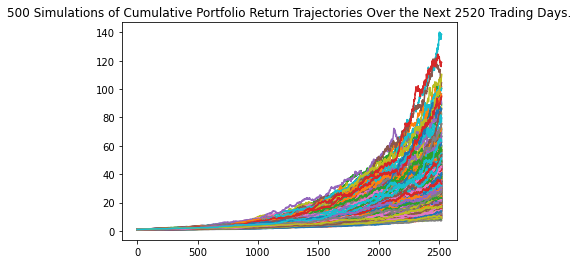

In [64]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_sim_line_plot = MC_SPY_AGG_ten.plot_simulation()

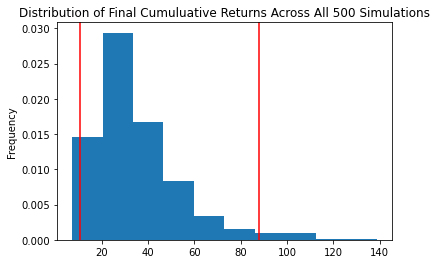

In [65]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_SPY_AGG_ten.plot_distribution()


In [66]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

MC_summary_statistics = MC_SPY_AGG_ten.summarize_cumulative_return()



print(MC_summary_statistics)
# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

count           500.000000
mean             35.135539
std              19.191747
min               7.307225
25%              22.179028
50%              30.254934
75%              43.499845
max             138.660435
95% CI Lower     10.752765
95% CI Upper     88.013850
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [67]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


65894.0

In [75]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds



# Print the result of your calculations
print(f"There is a 95% chance that the current portfolio of ST+B in the portfolio"
    f" over the next 10 years will end within in the range of"
    f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that the current portfolio of ST+B in the portfolio over the next 10 years will end within in the range of $ 708542.69 and $ 5799584.60.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years? 
#In the best scenario yes but the risk of making less is true as well in the worst case